In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from keras.layers import *
from keras.models import Sequential

Using TensorFlow backend.
c:\users\vishesh jain\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\vishesh jain\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\vishesh jain\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype

## Loading Dataset

In [4]:
X = np.load("data/train_x.npy")

In [5]:
Y = np.load("data/test_y.npy")[:-1]

In [6]:
print(X.shape)

(5129, 10, 4)


In [7]:
X[3]

array([[-1.2558755 , -1.23844714, -1.25525093, -1.24713926],
       [-1.24495855, -1.20768565, -1.24781193, -1.21029488],
       [-1.20420194, -1.20625488, -1.22493702, -1.22132995],
       [-1.22139613, -1.22011544, -1.26482863, -1.25780953],
       [-1.2558755 , -1.23075677, -1.2679902 , -1.23373301],
       [-1.22494414, -1.21036834, -1.22716872, -1.21521962],
       [-1.21857592, -1.20097893, -1.21712608, -1.20710291],
       [-1.20265537, -1.19874335, -1.22168246, -1.22087396],
       [-1.21948567, -1.20580777, -1.22447209, -1.21093327],
       [-1.19428571, -1.19516644, -1.20466576, -1.20108378]])

In [8]:
print(Y[2])

[-1.19428571]


In [9]:
X.shape

(5129, 10, 4)

## Train Test Split

In [10]:
split = int(len(X)*0.9)
XTrain = X[:split]
XTest = X[split:]
YTrain = Y[:split]
YTest = Y[split:]


## CNN Model

In [12]:
def get_model():    
    model = Sequential()
    model.add(Conv2D(64 , (2,2) , activation='tanh' , input_shape=(10,4,1)))
    model.add(Conv2D(64, (2,2) , activation='tanh' ))
    model.add(Dropout(1))
    model.add(Flatten())
    model.add(Dense(16 , activation='tanh'))
    model.add(Dense(8 , activation='tanh'))
    model.add(Dense(1 , activation='linear'))
    model.summary()
    return model

In [13]:
## function to preprocess the data for cnn model
def preprocess(X , Y):
    X = X.reshape((-1,10,4,1))
    return X  , Y 
(XTest,YTest) = preprocess(XTest , YTest)
(XTrain,YTrain) = preprocess(XTrain , YTrain)

X,Y = preprocess(X,Y)
XTrain.shape

(4616, 10, 4, 1)

In [16]:
model = get_model()
model.compile(optimizer='adam',loss="mean_squared_error")
Is_trained = True
if Is_trained == False:
    hist = model.fit(X,Y,epochs=20,validation_split=0.1,batch_size=128)
else:
    model.load_weights("output/cnn10/mode_final.h5")
    

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 9, 3, 64)          320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 2, 64)          16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                16400     
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

W1109 19:16:50.272427 19692 deprecation_wrapper.py:119] From c:\users\vishesh jain\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 4616 samples, validate on 513 samples
Epoch 1/20
4616/4616 [==============================] - 1s 322us/step - loss: 0.1979 - val_loss: 0.0477
Epoch 2/20
4616/4616 [==============================] - 1s 138us/step - loss: 0.0382 - val_loss: 0.0100
Epoch 3/20
4616/4616 [==============================] - 0s 106us/step - loss: 0.0211 - val_loss: 0.0056
Epoch 4/20
4616/4616 [==============================] - 0s 106us/step - loss: 0.0158 - val_loss: 0.0053
Epoch 5/20
4616/4616 [==============================] - 1s 118us/step - loss: 0.0116 - val_loss: 0.0039
Epoch 6/20
4616/4616 [==============================] - 1s 109us/step - loss: 0.0082 - val_loss: 0.0051
Epoch 7/20
4616/4616 [==============================] - 1s 126us/step - loss: 0.0073 - val_loss: 0.0032
Epoch 8/20
4616/4616 [==============================] - 0s 103us/step - loss: 0.0066 - val_loss: 0.0034
Epoch 9/20
4616/4616 [==============================] - 1s 120us/step - loss: 0.0065 - val_loss: 0.0080
Epoch 10/20
4616/

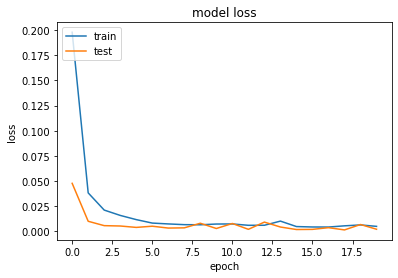

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
### function to plot results 
def plot_results(predicted_data, true_data , title =""):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.title(title)
    plt.legend()
    plt.show()

In [21]:
y_pred =model.predict(XTest)

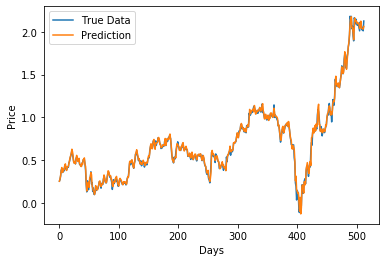

In [22]:
plot_results(y_pred , YTest)

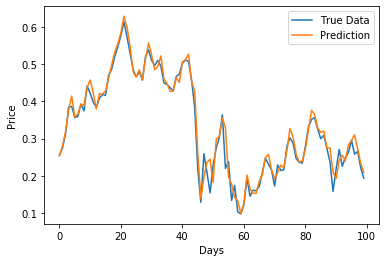

In [28]:
plot_results(y_pred[:100] , YTest[:100])

## Real Predictions 

In [34]:
std   = np.load("data/std.npy")[3]

In [35]:
mean = np.load("data/mean.npy")[3]

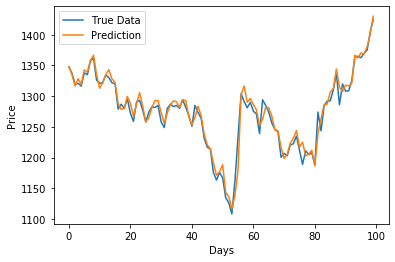

In [24]:
plot_results(y_pred[200:300] *std + mean, YTest[200:300] * std + mean)

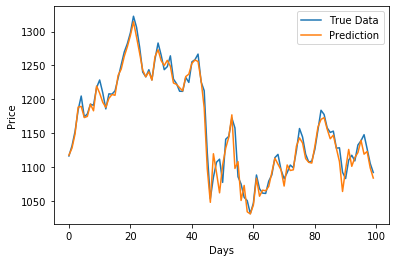

In [29]:
## next day prediction
mean = np.load("data/mean.npy")[3]
std =np.load("data/std.npy")[3]

x_c =XTest
y_c = YTest
predictions = model.predict( x_c)

npPredictions = np.asarray(predictions)


real_y = np.reshape(y_c, (y_c.shape[0], ))*std + mean
real_pred = predictions*std +mean

plot_results(real_y[:100], real_pred[:100])


## Multiple Days Prediction

In [30]:
from numpy import newaxis
import random
def predict_multiple_days(model ,data  , days_to_predict , seq_len , y_actual ):
    print('[Model] Predicting Sequences Multiple...')
    loss = []
    prediction_seqs = []
    y_actual_seqs=[]
    for i in range(len(data) - days_to_predict-1):
            curr_frame = data[i]
            #print("frame  ",curr_frame)
            predicted = []
            loss_temp = []
            y_ac = []
            for j in range(days_to_predict):
                #print("frame  ",curr_frame)
                #print("new Axis",newaxis)
                predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0] )
                curr_frame = curr_frame[1:]
                curr_frame = np.insert(curr_frame, seq_len-1, predicted[-1]+ random.uniform(-0.05 , 0.05), axis=0)
                loss_temp.append((y_actual[i+j][0] - predicted[-1] )**2)
                y_ac.append(y_actual[i+j][0])
            loss.append(loss_temp)
            prediction_seqs.append(predicted)
            y_actual_seqs.append(y_ac)
    return prediction_seqs , loss , y_actual_seqs

In [31]:
prediction_seqs , loss , y_actual_seqs = predict_multiple_days(model,XTest , 50 , 10 , YTest)

[Model] Predicting Sequences Multiple...


0


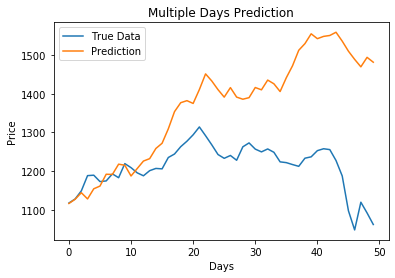

1


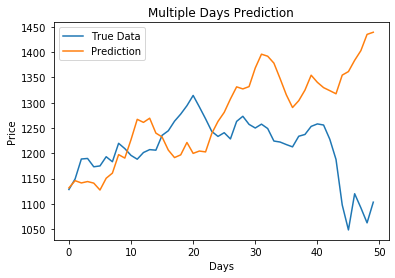

2


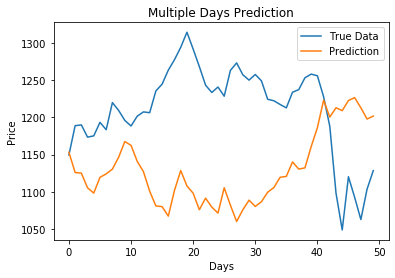

3


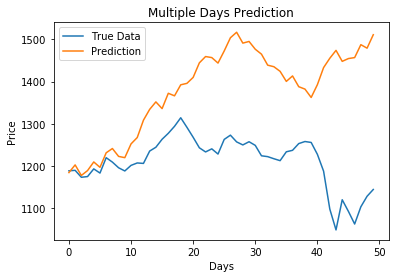

4


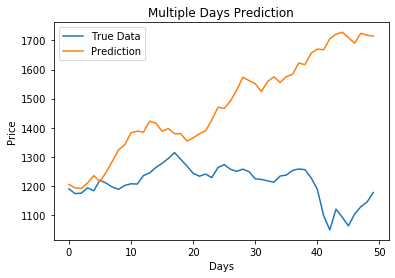

5


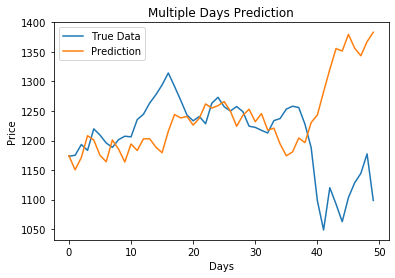

6


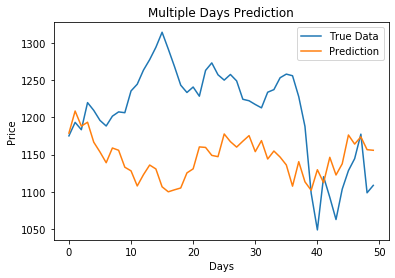

7


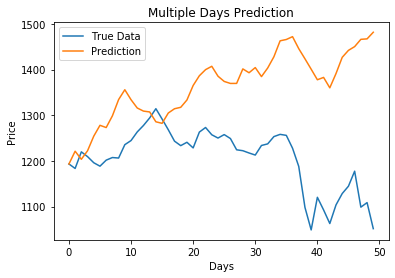

8


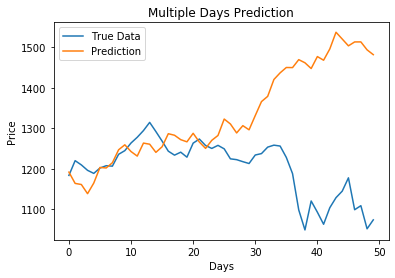

9


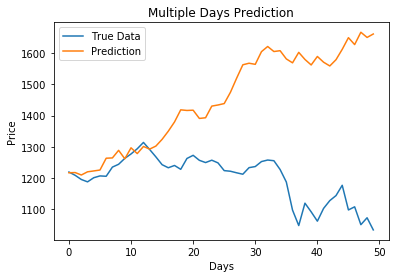

10


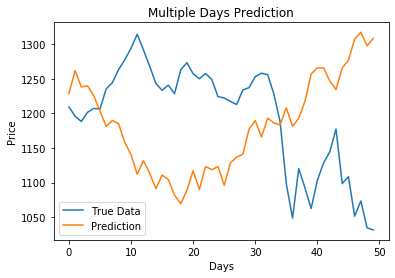

11


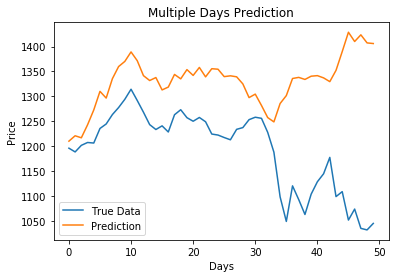

12


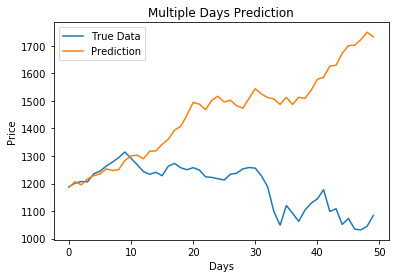

13


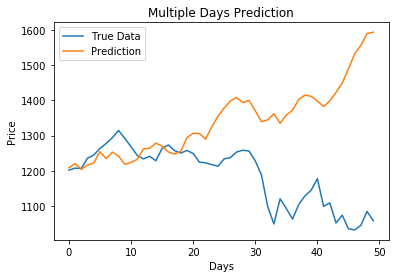

14


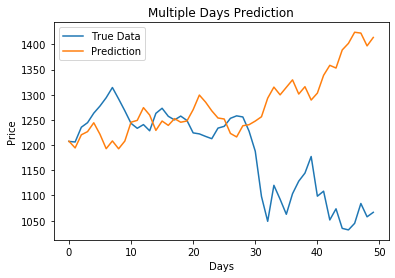

15


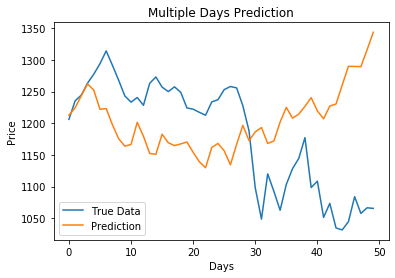

16


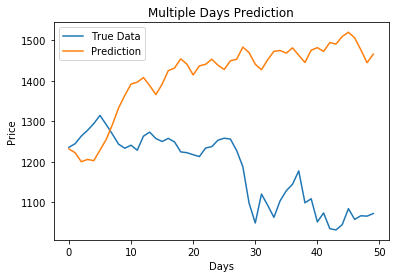

17


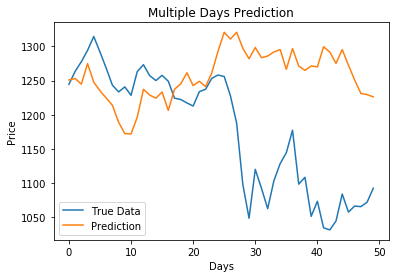

18


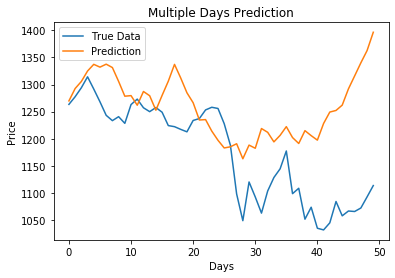

19


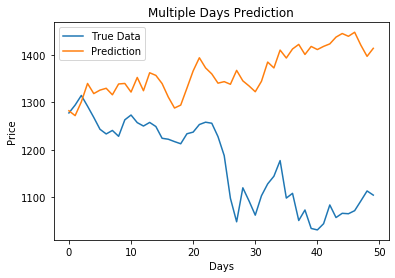

20


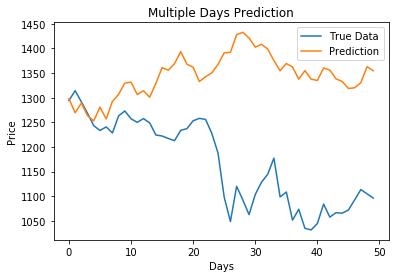

21


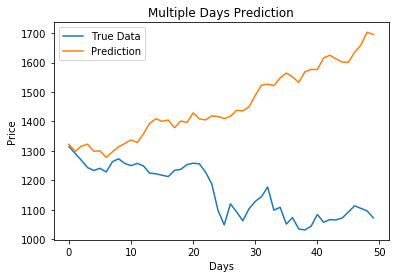

22


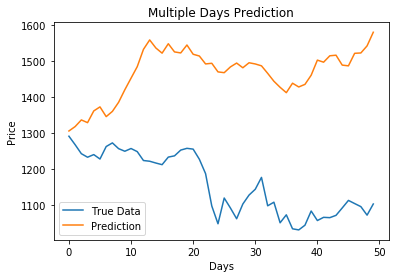

23


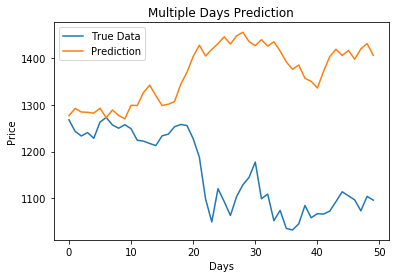

24


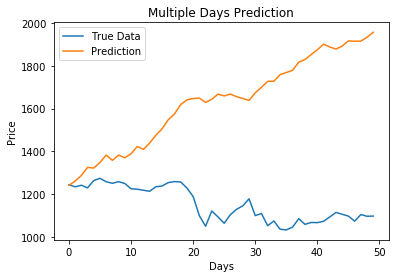

25


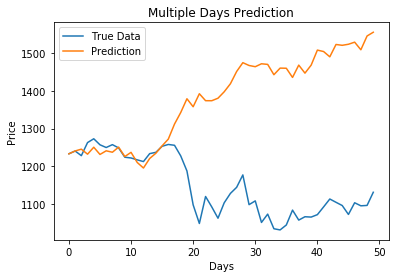

26


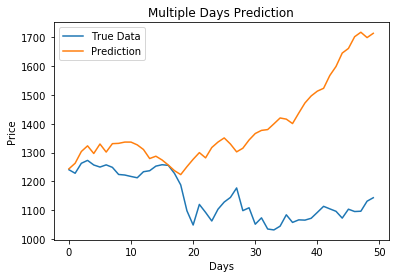

27


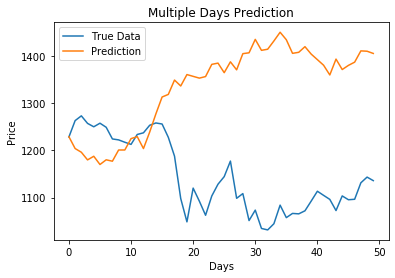

28


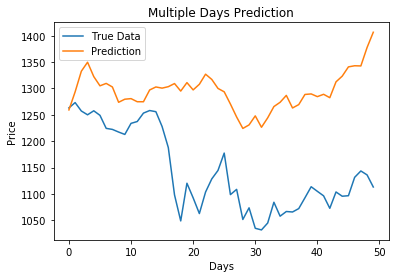

29


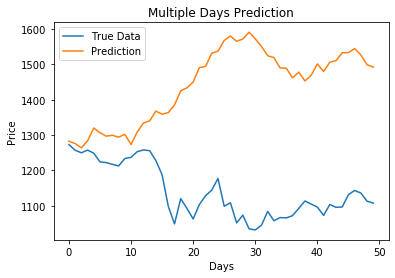

30


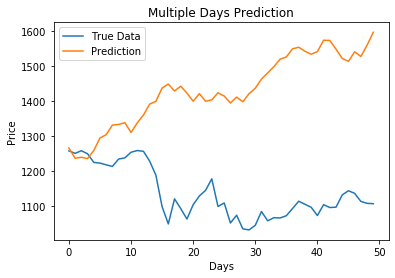

31


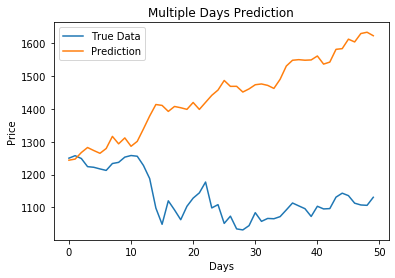

32


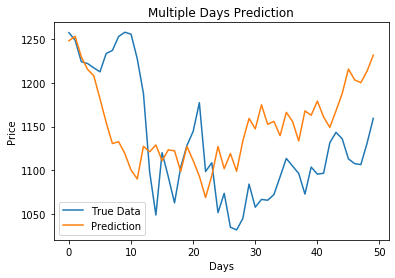

33


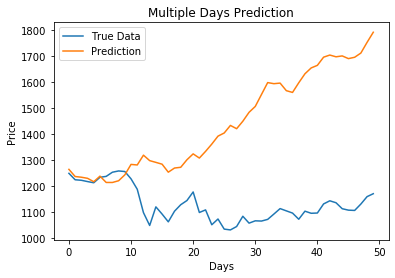

34


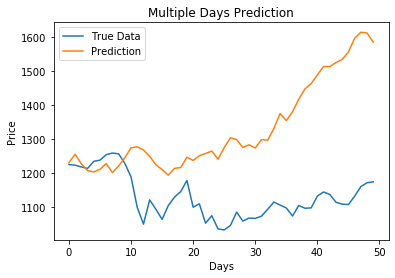

35


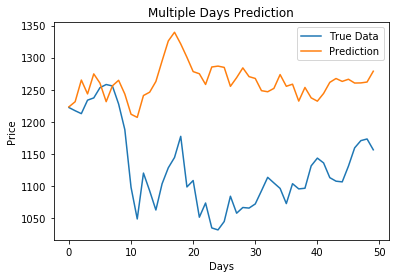

36


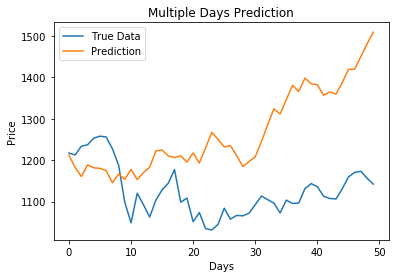

37


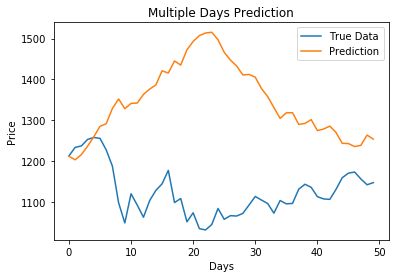

38


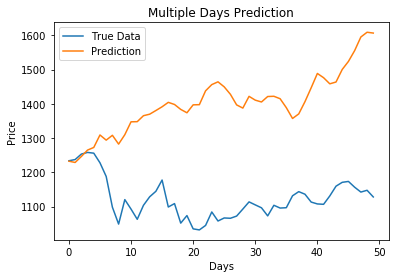

39


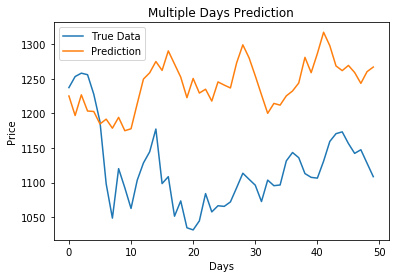

40


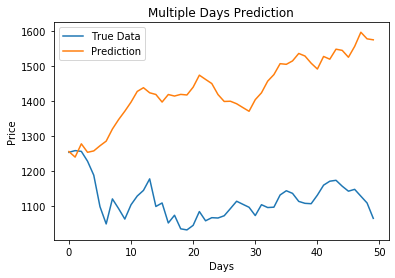

41


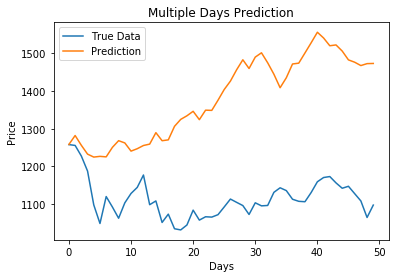

42


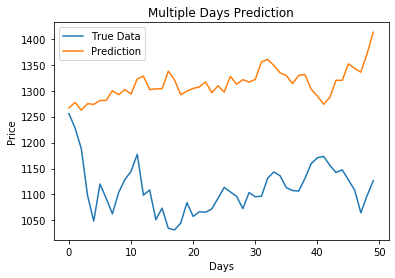

43


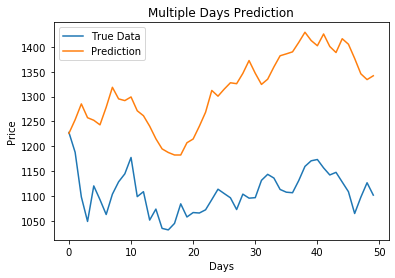

44


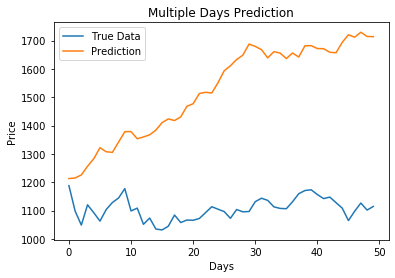

45


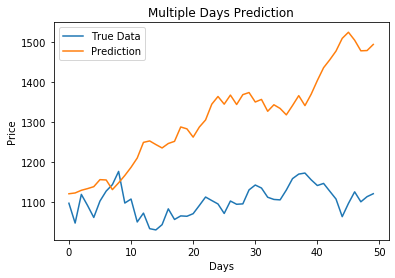

46


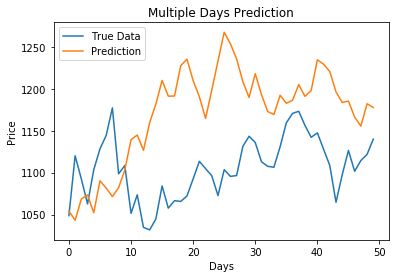

47


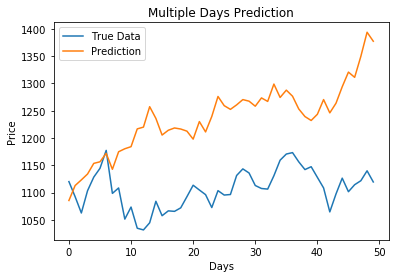

48


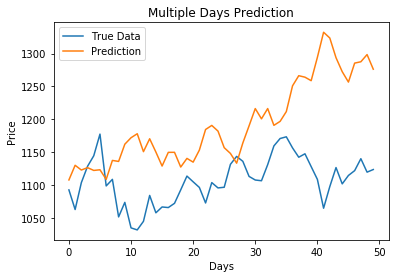

49


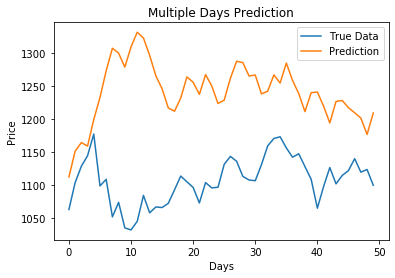

50


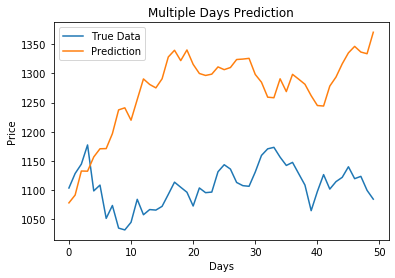

51


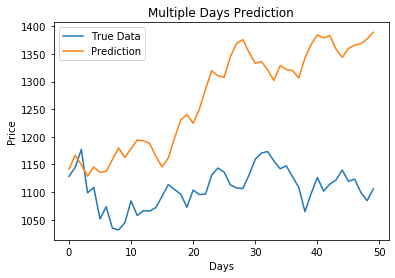

52


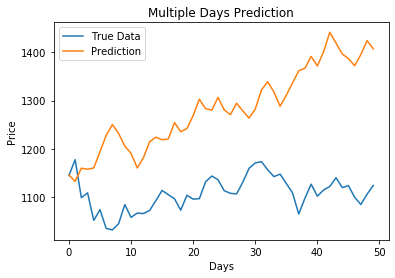

53


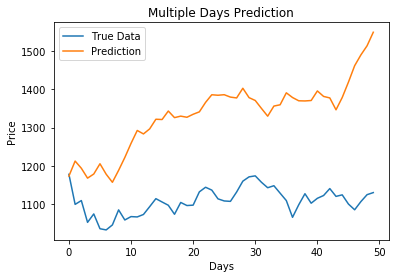

54


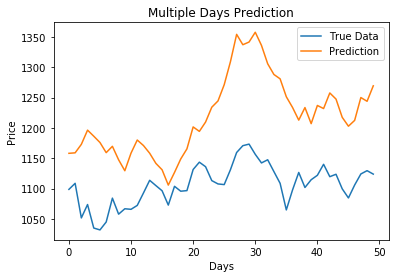

55


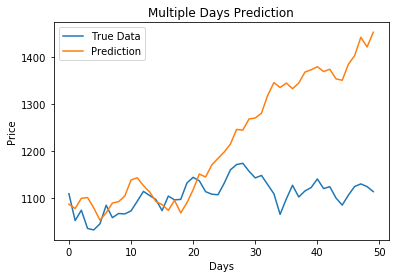

56


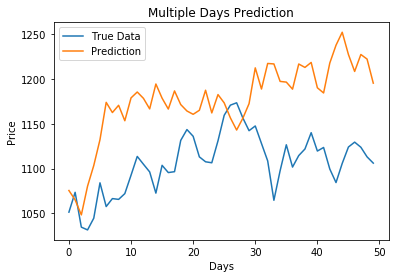

57


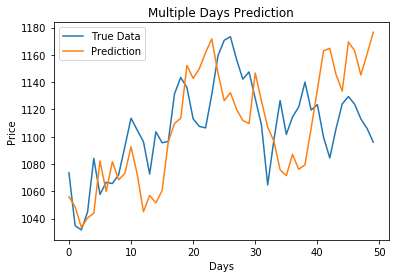

58


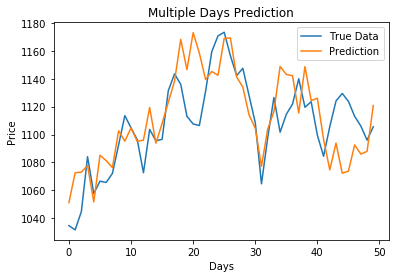

59


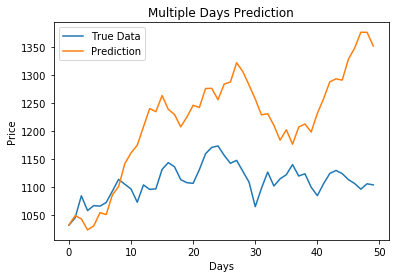

60


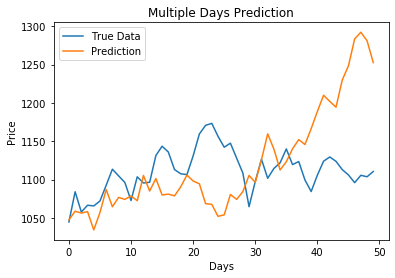

61


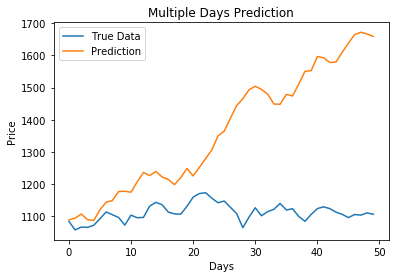

62


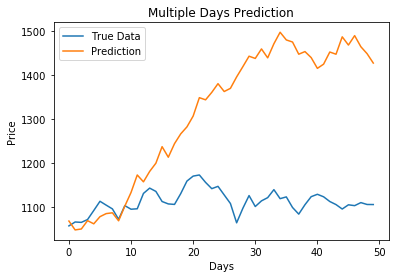

63


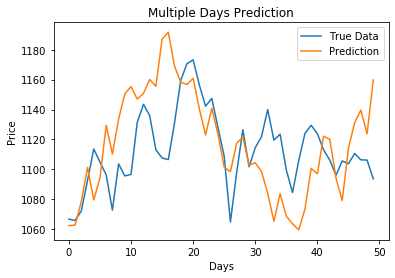

64


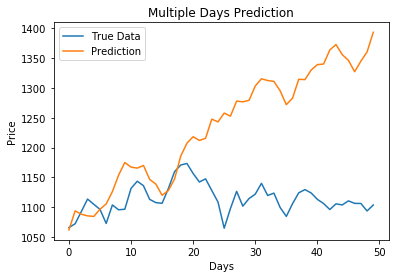

65


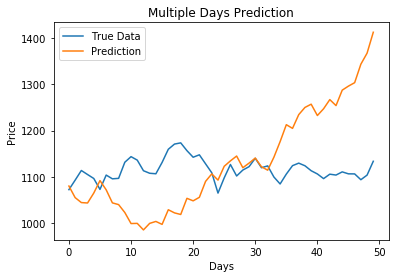

66


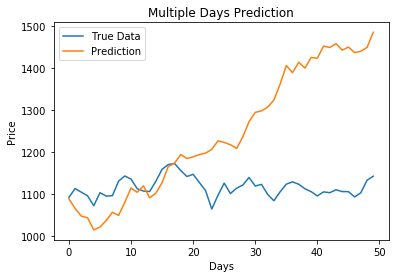

67


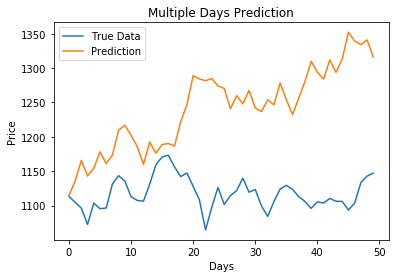

68


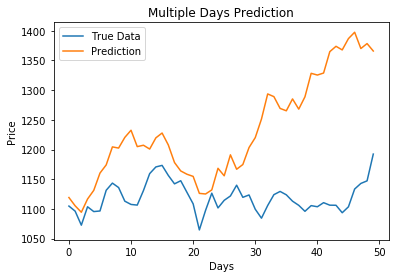

69


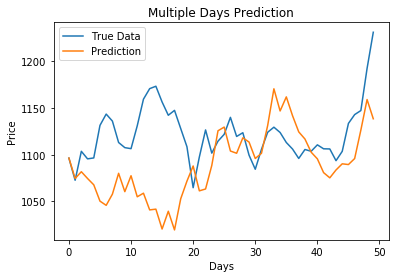

70


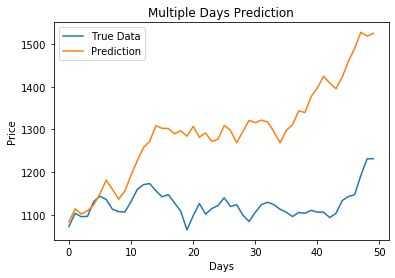

71


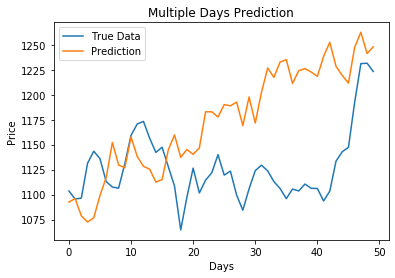

72


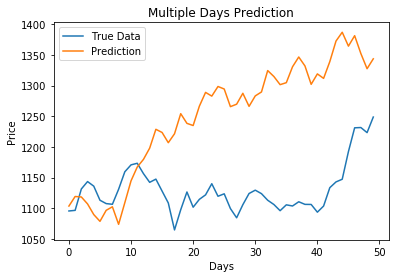

73


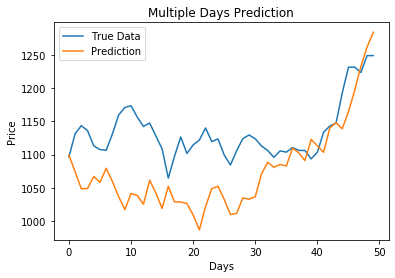

74


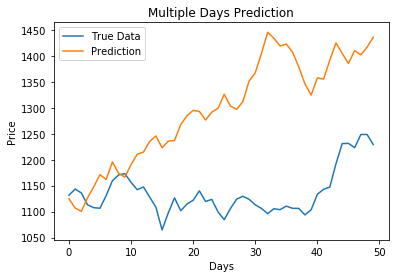

75


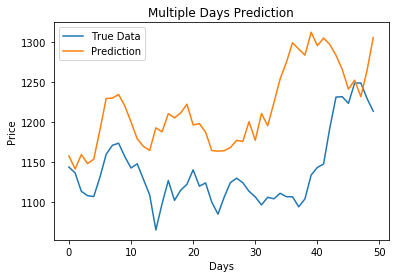

76


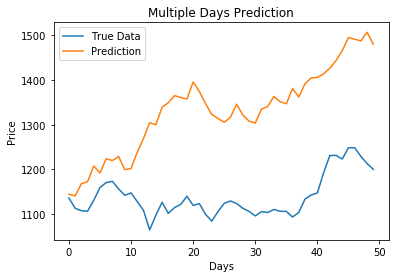

77


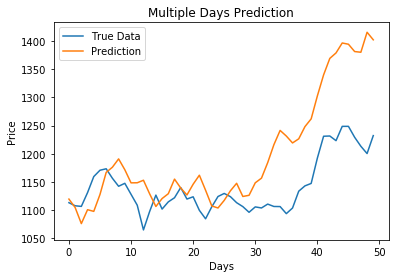

78


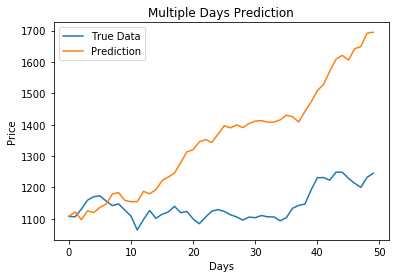

79


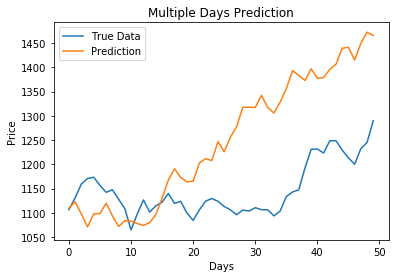

80


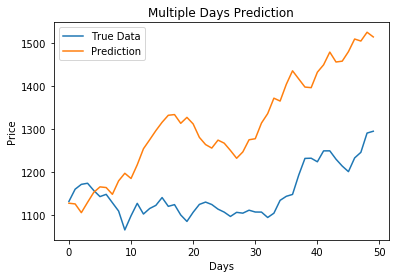

81


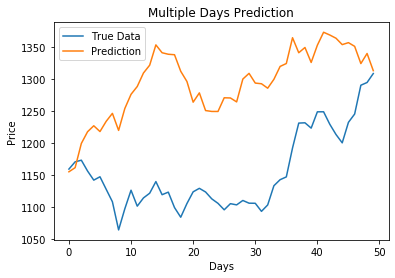

82


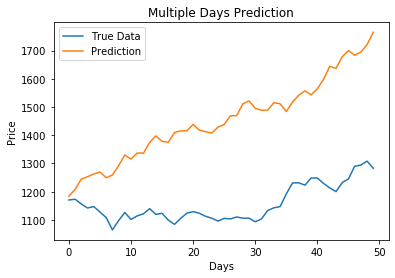

83


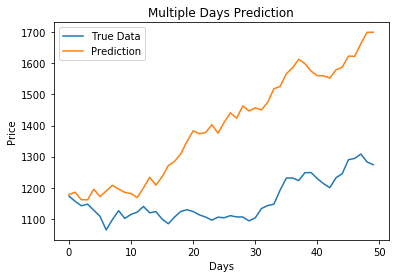

84


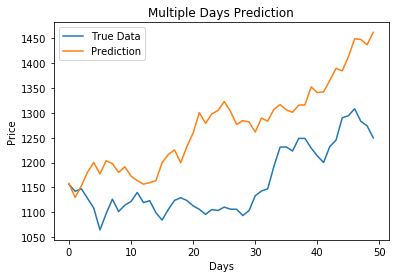

85


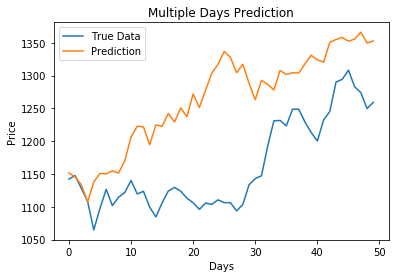

86


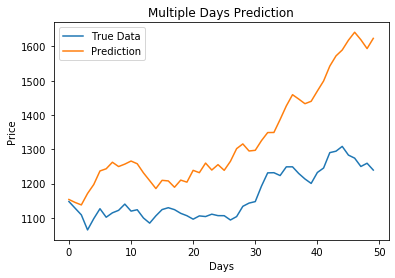

87


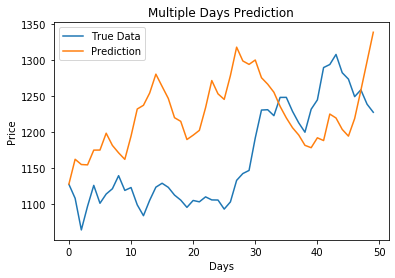

88


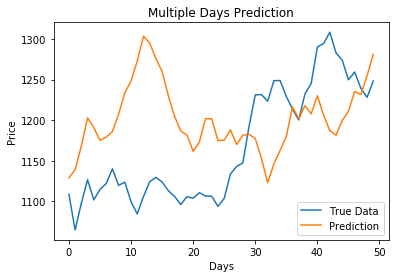

89


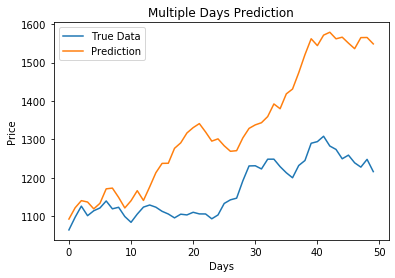

90


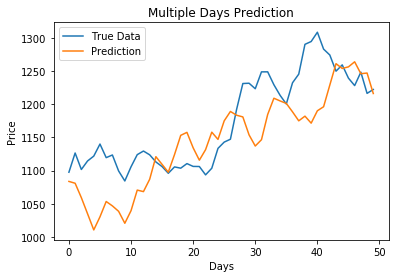

91


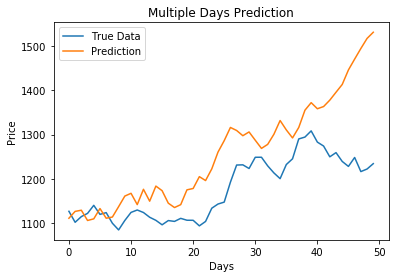

92


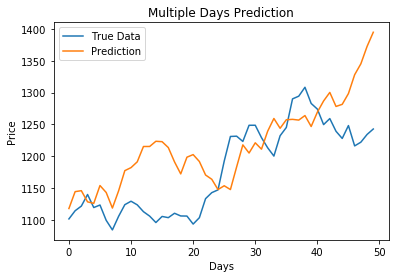

93


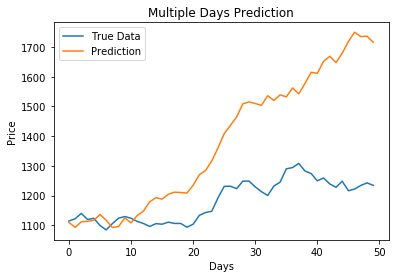

94


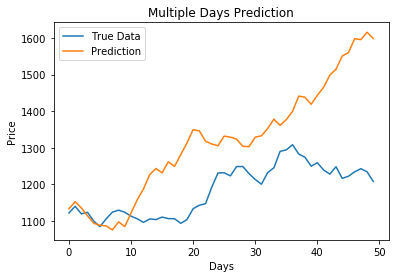

95


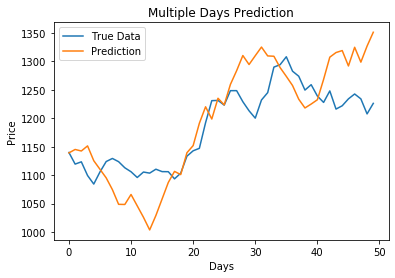

96


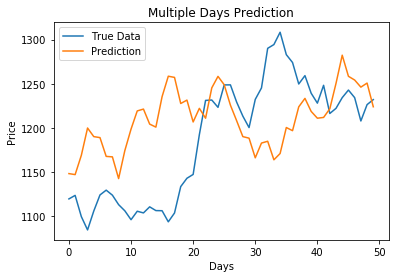

97


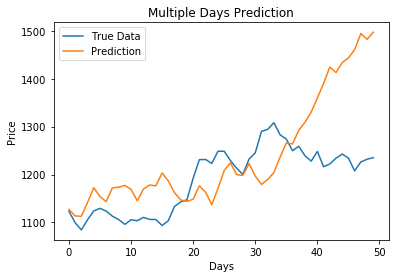

98


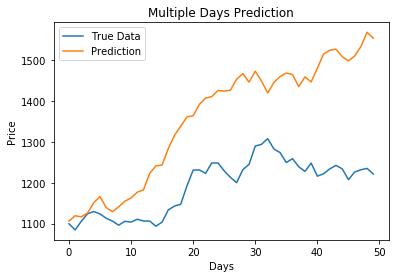

99


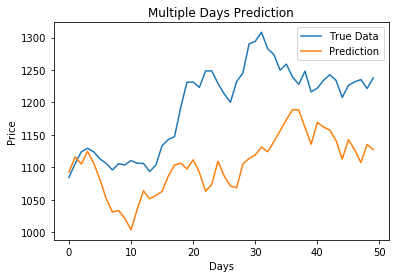

In [39]:
for d in range (100):
    prediction_seqs = np.array(prediction_seqs)
    y_actual_seqs = np.array(y_actual_seqs)
    size = 15
    print(d)
    plot_results(prediction_seqs[d]*std + mean ,y_actual_seqs[d]*std + mean, "Multiple Days Prediction" )

In [18]:
def avg_loss(loss):
    loss = np.array(loss)
    return np.average(loss ,axis=0)

In [19]:
avgloss = avg_loss(loss)

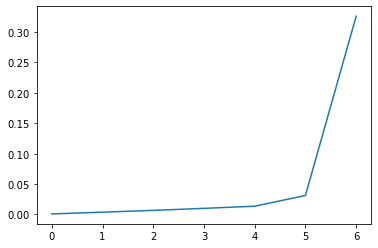

In [20]:
print_loss = []
print_loss.append(avgloss[0])
print_loss.append(avgloss[1])
print_loss.append(avgloss[2])
print_loss.append(avgloss[3])
print_loss.append(avgloss[4])
print_loss.append(avgloss[9])
print_loss.append(avgloss[49])

plt.plot(print_loss)
plt.show()

In [95]:
avgloss[49]

0.32606054285945935

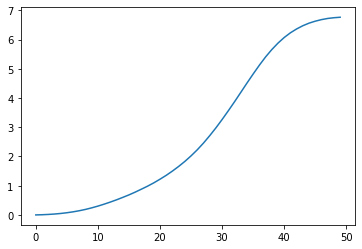

In [31]:
plt.plot(avgloss)
plt.show()

In [96]:
def save_weights(model):
    model.save_weights("output/cnn10/mode_final.h5")


## Performance Measures
### multiple days predictions

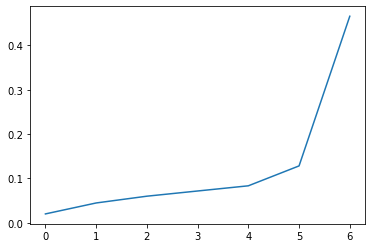

In [25]:
def MeanAbsoluteError(loss):
    loss = np.array(loss)
    loss = loss**(0.5)
    loss = np.array(loss)
    avgloss =  np.average(loss ,axis=0)
    
    print_loss = []
    print_loss.append(avgloss[0])
    print_loss.append(avgloss[1])
    print_loss.append(avgloss[2])
    print_loss.append(avgloss[3])
    print_loss.append(avgloss[4])
    print_loss.append(avgloss[9])
    print_loss.append(avgloss[49])
  
    plt.plot(print_loss)
    return avgloss

mae  = MeanAbsoluteError(loss)


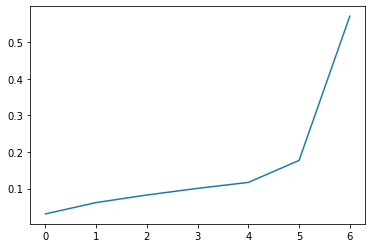

In [26]:
def rms(loss):
    loss = np.array(loss)
    print_loss = []
    avgloss = np.sqrt ( np.average(loss ,axis=0))    
    print_loss.append(avgloss[0])
    print_loss.append(avgloss[1])
    print_loss.append(avgloss[2])
    print_loss.append(avgloss[3])
    print_loss.append(avgloss[4])
    print_loss.append(avgloss[9])
    print_loss.append(avgloss[49])
  
    plt.plot(print_loss)
    return avgloss
rms = rms(loss)

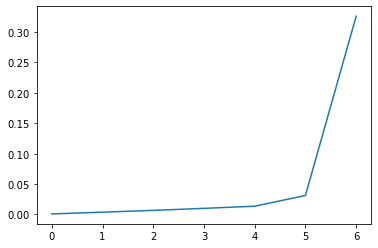

In [27]:
def mse(loss):
    loss = np.array(loss)
    print_loss = []
    avgloss = np.average(loss ,axis=0)   
    print_loss.append(avgloss[0])
    print_loss.append(avgloss[1])
    print_loss.append(avgloss[2])
    print_loss.append(avgloss[3])
    print_loss.append(avgloss[4])
    print_loss.append(avgloss[9])
    print_loss.append(avgloss[49])
  
    plt.plot(print_loss)
    return avgloss
mse = mse(loss)

In [28]:
mse[49]

0.32606054285945935

In [29]:
from sklearn.metrics import mean_squared_error , r2_score
import math
def r2square(ytest , ypred) :
    ytest = np.array(ytest)
    ypred = np.array(ypred)
    loss =[]
    for i in range (50):
        loss.append(r2_score(ytest[:,i] , ypred[:,i]) )
    return loss
r2 = r2square(prediction_seqs , y_actual_seqs)
print(r2)

[0.987895153315373, 0.9505546405774347, 0.9110679573512779, 0.8663881074488317, 0.817614148426567, 0.7670473936642596, 0.7208856229021098, 0.6780558960394576, 0.6359095610703809, 0.5871170153668683, 0.5386752638594539, 0.4822001991910311, 0.42663832033058424, 0.3733307823831804, 0.31411755697967336, 0.2583225213423753, 0.19443016812574399, 0.1362835508563941, 0.08914702865785007, 0.04012720203677678, -0.018757068348258965, -0.07384313360748607, -0.12876786830009235, -0.1838624586963178, -0.2342984244203461, -0.28453336606750845, -0.3352186619313091, -0.39023942734729333, -0.453615384641451, -0.5140831079451711, -0.5779033434415761, -0.6396732712959339, -0.6951154363382592, -0.7475361582512321, -0.8016299569819982, -0.8594057415941021, -0.9181704148808629, -0.9786314173348896, -1.036514202242786, -1.0933084961804176, -1.1545673248953072, -1.2180579161103187, -1.2831303044469053, -1.3428334676431661, -1.402658570941536, -1.461887797274866, -1.5226152016182724, -1.582129992291681, -1.6358

In [30]:
def Save_Performance_Measures():
    np.save("Performance Measures/cnn/r2",r2)
    np.save("Performance Measures/cnn/mse",mse)
    np.save("Performance Measures/cnn/rms",rms)
    np.save("Performance Measures/cnn/mae",mae)
    np.save("Performance Measures/cnn/pred_seqs",prediction_seqs)
    np.save("Performance Measures/cnn/actual_seqs",y_actual_seqs)
    np.save("Performance Measures/cnn/real_pred",real_pred)
    np.save("Performance Measures/cnn/real_y",real_y)
Save_Performance_Measures()